In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [3]:
activity = pd.read_csv("Customer Flight Activity.csv", index_col=0)
loyalty = pd.read_csv("Customer Loyalty History.csv", index_col=0)

display(activity.head())
display(loyalty.head())

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [55]:
def exploracion_basica(lista_df):
    for df in lista_df:
       display(df.head())
       print(df.shape)
       print('')
       print(df.isnull().sum()/df.shape[0]*100)
       print('')
       print(df.dtypes)
       for columna in df.select_dtypes(include='O'):
        print(df[columna].value_counts())
        print('')
       

       print('-'*20) 
        # for columna in df:
        #     print(columna.isnull().sum())
    
        


In [56]:
exploracion_basica([activity,loyalty])

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


(405624, 9)

year                           0.0
month                          0.0
flights booked                 0.0
flights with companions        0.0
total flights                  0.0
distance                       0.0
points accumulated             0.0
points redeemed                0.0
dollar cost points redeemed    0.0
dtype: float64

year                             int64
month                            int64
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
dtype: object
--------------------


,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,
480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2
549612,canada,alberta,edmonton,t3g 6y6,male,college,NaN,divorced,star,3839.61,standard,2016,3
429460,canada,british columbia,vancouver,v6e 3d9,male,college,NaN,single,star,3839.75,standard,2014,7
608370,canada,ontario,toronto,p1w 1k4,male,college,NaN,single,star,3839.75,standard,2013,2
530508,canada,quebec,hull,j8y 3z5,male,bachelor,103495.0,married,star,3842.79,standard,2014,10


(16737, 13)

country              0.000000
province             0.000000
city                 0.000000
postal code          0.000000
gender               0.000000
education            0.000000
salary              25.321145
marital status       0.000000
loyalty card         0.000000
clv                  0.000000
enrollment type      0.000000
enrollment year      0.000000
enrollment month     0.000000
dtype: float64

country              object
province             object
city                 object
postal code          object
gender               object
education            object
salary              float64
marital status       object
loyalty card         object
clv                 float64
enrollment type      object
enrollment year       int64
enrollment month      int64
dtype: object
country
canada    16737
Name: count, dtype: int64

province
ontario                 5404
british columbia        4409
quebec                  3300
alberta                  969
manitoba                 65

In [46]:
loyalty.drop(columns=['Cancellation Month', 'Cancellation Year'], axis=1, inplace=True)

In [47]:
loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [48]:
def nuevas_columnas(df):
    nuevas_columnas = {columna: columna.lower() for columna in df.columns}
    return df.rename(columns=nuevas_columnas, inplace= True)

def unify(valor):
    try:
        return valor.lower().strip()
    except:
        return valor

# aplicar cambios a df    
def homog_tablas(lista_df):
    for df in lista_df:
        nuevas_columnas(df)
    
    for df in lista_df:
        for columna in df.columns:
            df[columna] = df[columna].apply(unify)

In [49]:
homog_tablas([activity, loyalty])

In [50]:
display(activity.head())
display(loyalty.head())

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,
480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2
549612,canada,alberta,edmonton,t3g 6y6,male,college,NaN,divorced,star,3839.61,standard,2016,3
429460,canada,british columbia,vancouver,v6e 3d9,male,college,NaN,single,star,3839.75,standard,2014,7
608370,canada,ontario,toronto,p1w 1k4,male,college,NaN,single,star,3839.75,standard,2013,2
530508,canada,quebec,hull,j8y 3z5,male,bachelor,103495.0,married,star,3842.79,standard,2014,10


In [54]:
for columna in loyalty.select_dtypes(include='O'):
    print(loyalty[columna].value_counts())
    print('')

country
canada    16737
Name: count, dtype: int64

province
ontario                 5404
british columbia        4409
quebec                  3300
alberta                  969
manitoba                 658
new brunswick            636
nova scotia              518
saskatchewan             409
newfoundland             258
yukon                    110
prince edward island      66
Name: count, dtype: int64

city
toronto           3351
vancouver         2582
montreal          2059
winnipeg           658
whistler           582
halifax            518
ottawa             509
trenton            486
edmonton           486
quebec city        485
dawson creek       444
fredericton        425
regina             409
kingston           401
tremblant          398
victoria           389
hull               358
west vancouver     324
st. john's         258
thunder bay        256
sudbury            227
moncton            211
calgary            191
banff              179
london             174
peace river   

## unir df

In [59]:
df = activity.merge(loyalty, how='left', on='Loyalty Number')
df.head()

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
100102,2017,1,10,4,14,2030,203.0,0,0,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,3
100140,2017,1,6,0,6,1200,120.0,0,0,canada,british columbia,dawson creek,u5i 4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7
100214,2017,1,0,0,0,0,0.0,0,0,canada,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8
100272,2017,1,0,0,0,0,0.0,0,0,canada,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1


In [79]:
df.to_csv('datos_flight.csv')

In [60]:
print(activity.shape)
print(loyalty.shape)
print(df.shape)

(405624, 9)
(16737, 13)
(405624, 22)


In [62]:
exploracion_basica([df])

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
100102,2017,1,10,4,14,2030,203.0,0,0,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,3
100140,2017,1,6,0,6,1200,120.0,0,0,canada,british columbia,dawson creek,u5i 4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7
100214,2017,1,0,0,0,0,0.0,0,0,canada,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8
100272,2017,1,0,0,0,0,0.0,0,0,canada,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1


(405624, 22)

year                            0.000000
month                           0.000000
flights booked                  0.000000
flights with companions         0.000000
total flights                   0.000000
distance                        0.000000
points accumulated              0.000000
points redeemed                 0.000000
dollar cost points redeemed     0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.312112
marital status                  0.000000
loyalty card                    0.000000
clv                             0.000000
enrollment type                 0.000000
enrollment year                 0.000000
enrollment month                0.000000
dtype: float64

year                             int64
month                        

## exploración salary

In [105]:
df2 = df.copy()

In [111]:
df[(df['education']=='college')]['salary'].value_counts()

Series([], Name: count, dtype: int64)

In [115]:
df['salary'].isnull().sum()/df.shape[0]*100

25.31360946745562

In [114]:
df[(df['education']=='college')]['salary'].isnull().sum()/df.shape[0]*100

25.31360946745562

In [109]:
df = df.drop(df[(df['education']=='high school or below') & (df['salary'] < 0)].index)

In [67]:
df['salary'].agg(['mean', 'median', 'std', 'min', 'max'])

mean       79268.825953
median     73479.000000
std        34992.133508
min       -58486.000000
max       407228.000000
Name: salary, dtype: float64

In [110]:
for level in df['education'].unique():
    try:
        print(df[df['education']== level]['salary'].isnull().sum()/df.shape[0]*100)
        print(level, '\n', df[(df['salary'] < 0) & (df['education'] == level)]['salary'].agg(['min', 'max', 'mean', 'median', 'std']))
        print(level, '\n', df[(df['salary'] > 0) & (df['education'] == level)]['salary'].agg(['min', 'max', 'mean', 'median', 'std']))
        print('')
    except:
        pass

0.0
bachelor 
 min      -58486.000000
max       -9081.000000
mean     -34786.052632
median   -39503.000000
std       15669.232112
Name: salary, dtype: float64
bachelor 
 min        15609.000000
max       105563.000000
mean       72669.312393
median     72029.000000
std        16594.537958
Name: salary, dtype: float64

25.31360946745562
college 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
college 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64

0.0
master 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
master 
 min        56414.000000
max       133080.000000
mean      103767.494163
median    105487.000000
std        17514.343573
Name: salary, dtype: float64

0.0
high school or below 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
high school or below 
 min       21853.000000
max       93875.0000

In [116]:
df.to_csv('datos_flight.csv')

In [117]:
df.shape

(405600, 22)

In [120]:
df[df.duplicated()]

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
101902,2017,1,0,0,0,0,0.0,0,0,canada,ontario,london,m5b 3e4,female,college,NaN,married,aurora,6265.34,standard,2017,1
112142,2017,1,0,0,0,0,0.0,0,0,canada,ontario,thunder bay,k8t 5m5,male,bachelor,93073.0,single,aurora,16272.74,standard,2015,7
126100,2017,1,0,0,0,0,0.0,0,0,canada,new brunswick,fredericton,e3b 2h2,female,master,121261.0,divorced,nova,17790.41,standard,2013,11
130331,2017,1,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3j 9s2,female,bachelor,79207.0,divorced,nova,2862.73,standard,2016,12
135421,2017,1,0,0,0,0,0.0,0,0,canada,nova scotia,halifax,b3c 2m8,female,bachelor,91156.0,married,aurora,17441.64,standard,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949628,2018,12,0,0,0,0,0.0,0,0,canada,saskatchewan,regina,s6j 3g0,female,college,NaN,married,star,2563.58,standard,2012,7
960050,2018,12,0,0,0,0,0.0,0,0,canada,ontario,thunder bay,k8t 5m5,female,bachelor,103151.0,single,aurora,8622.84,standard,2015,12
971370,2018,12,0,0,0,0,0.0,0,0,canada,ontario,toronto,p2t 6g3,male,bachelor,63791.0,married,aurora,5261.04,standard,2012,7


In [122]:
df2 =df.copy()
df.shape

(405600, 22)

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
df.shape

(403736, 22)

In [127]:
print(df2.duplicated().sum())
print(df.duplicated().sum())

0
1864


## comprobaciones generales

In [155]:
df = pd.read_csv('fligh-data-clean.csv', index_col=0)
df.shape

(403736, 22)

In [140]:
df.isnull().sum()/df.shape[0]*100

year                            0.000000
month                           0.000000
flights booked                  0.000000
flights with companions         0.000000
total flights                   0.000000
distance                        0.000000
points accumulated              0.000000
points redeemed                 0.000000
dollar cost points redeemed     0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.328432
marital status                  0.000000
loyalty card                    0.000000
clv                             0.000000
enrollment type                 0.000000
enrollment year                 0.000000
enrollment month                0.000000
dtype: float64

In [136]:
df.head()

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8
100102,2017,1,10,4,14,2030,203.0,0,0,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,3
100140,2017,1,6,0,6,1200,120.0,0,0,canada,british columbia,dawson creek,u5i 4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7
100214,2017,1,0,0,0,0,0.0,0,0,canada,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8
100272,2017,1,0,0,0,0,0.0,0,0,canada,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1


In [130]:
df[['flights booked', 'flights with companions', 'total flights', 'distance']]

,flights booked,flights with companions,total flights,distance
Loyalty Number,,,,
100018,3,0,3,1521
100102,10,4,14,2030
100140,6,0,6,1200
100214,0,0,0,0
100272,0,0,0,0
...,...,...,...,...
999902,0,0,0,0
999911,0,0,0,0
999940,3,0,3,1233


In [137]:
df.columns

Index(['year', 'month', 'flights booked', 'flights with companions',
       'total flights', 'distance', 'points accumulated', 'points redeemed',
       'dollar cost points redeemed', 'country', 'province', 'city',
       'postal code', 'gender', 'education', 'salary', 'marital status',
       'loyalty card', 'clv', 'enrollment type', 'enrollment year',
       'enrollment month'],
      dtype='object')

In [133]:
df[df['flights booked'] < df['total flights']][['flights booked', 'total flights']]

,flights booked,total flights
Loyalty Number,,
100102,10,14
863070,8,15
100753,8,12
100816,9,10
100853,6,12
...,...,...
641642,7,9
999120,9,16
999272,12,20


In [142]:
df[df['flights booked'] + df['flights with companions'] != df['total flights']][['flights booked', 'total flights']]

,flights booked,total flights
Loyalty Number,,


In [134]:
df[df['flights booked'] < df['flights with companions']][['flights booked', 'total flights']]

,flights booked,total flights
Loyalty Number,,


In [135]:
df[(df['total flights'] > 0) & (df['distance'] == 0)]

,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,


In [144]:
df['salary'].isnull().sum()

102260

In [156]:
for level in df['education'].unique():
    try:
        print(df[df['education']== level]['salary'].isnull().sum()/df.shape[0]*100)
        print(level, '\n', df[(df['salary'] < 0) & (df['education'] == level)]['salary'].agg(['min', 'max', 'mean', 'median', 'std']))
        print(level, '\n', df[(df['salary'] > 0) & (df['education'] == level)]['salary'].agg(['min', 'max', 'mean', 'median', 'std']))
        print('')
    except:
        pass

0.0
bachelor 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
bachelor 
 min         9081.000000
max       105563.000000
mean       72599.080913
median     71972.000000
std        16667.675569
Name: salary, dtype: float64

25.32843244100105
college 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
college 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64

0.0
master 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
master 
 min        56414.000000
max       133080.000000
mean      103734.523724
median    105487.000000
std        17518.492270
Name: salary, dtype: float64

0.0
high school or below 
 min      NaN
max      NaN
mean     NaN
median   NaN
std      NaN
Name: salary, dtype: float64
high school or below 
 min       21853.000000
max       93875.000000
mean      61160.755016
median    61902.000000
s

## visualizaciones

In [157]:
df = pd.read_csv('fligh-data-clean.csv', index_col=0)

In [158]:
df.columns

Index(['year', 'month', 'flights booked', 'flights with companions',
       'total flights', 'distance', 'points accumulated', 'points redeemed',
       'dollar cost points redeemed', 'country', 'province', 'city',
       'postal code', 'gender', 'education', 'salary', 'marital status',
       'loyalty card', 'clv', 'enrollment type', 'enrollment year',
       'enrollment month'],
      dtype='object')

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [159]:
df['year'].value_counts()

year
2018    202010
2017    201726
Name: count, dtype: int64

In [163]:
df_booked = df[df['flights booked'] > 0]

Text(0.5, 1.0, 'Vuelos reservados en 2017')

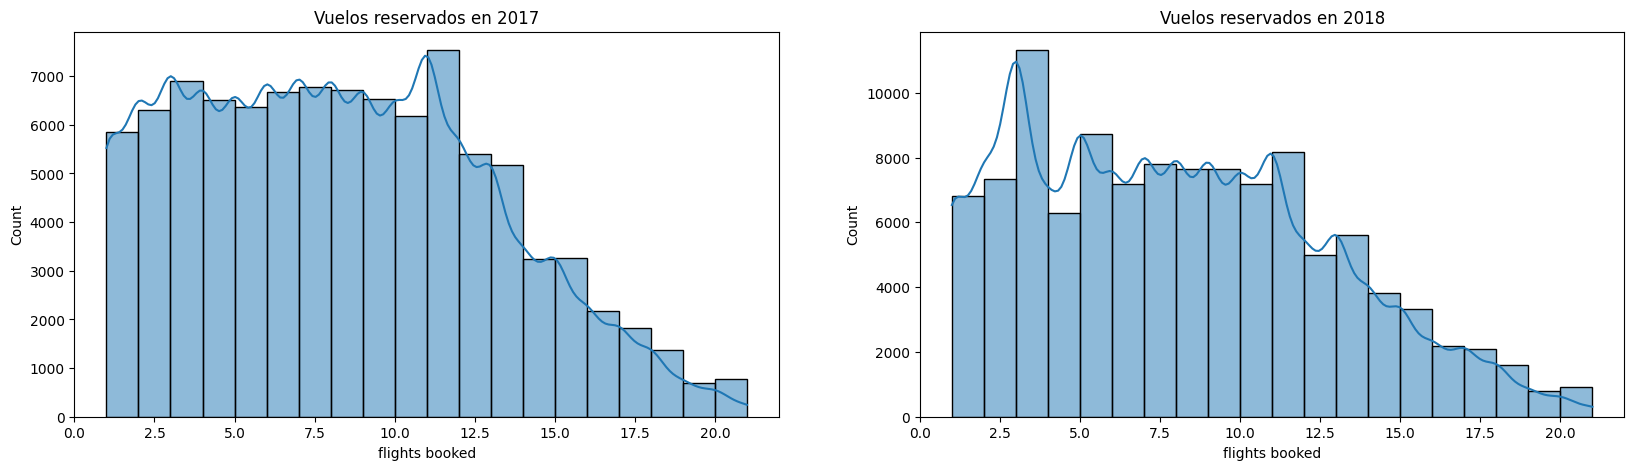

In [169]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.histplot(x='flights booked',
             data = df_booked[df_booked['year']==2018],
             kde=True,
             bins=20,
             ax=axes[1])
axes[1].set_title('Vuelos reservados en 2018')

sns.histplot(x='flights booked',
             data = df_booked[df_booked['year']==2017],
             kde=True,
             bins=20,
             ax=axes[0])
axes[0].set_title('Vuelos reservados en 2017')

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [181]:
df_booked[df_booked['points redeemed']>0][['distance', 'points accumulated', 'points redeemed']]

,distance,points accumulated,points redeemed
Loyalty Number,,,
863070,4245,424.00,341
691626,4245,424.00,341
159942,4576,457.00,364
627915,3757,375.00,310
471706,5896,589.00,445
...,...,...,...
205087,704,70.00,571
473410,882,95.04,590
275209,768,95.00,528


<Axes: xlabel='distance', ylabel='points accumulated'>

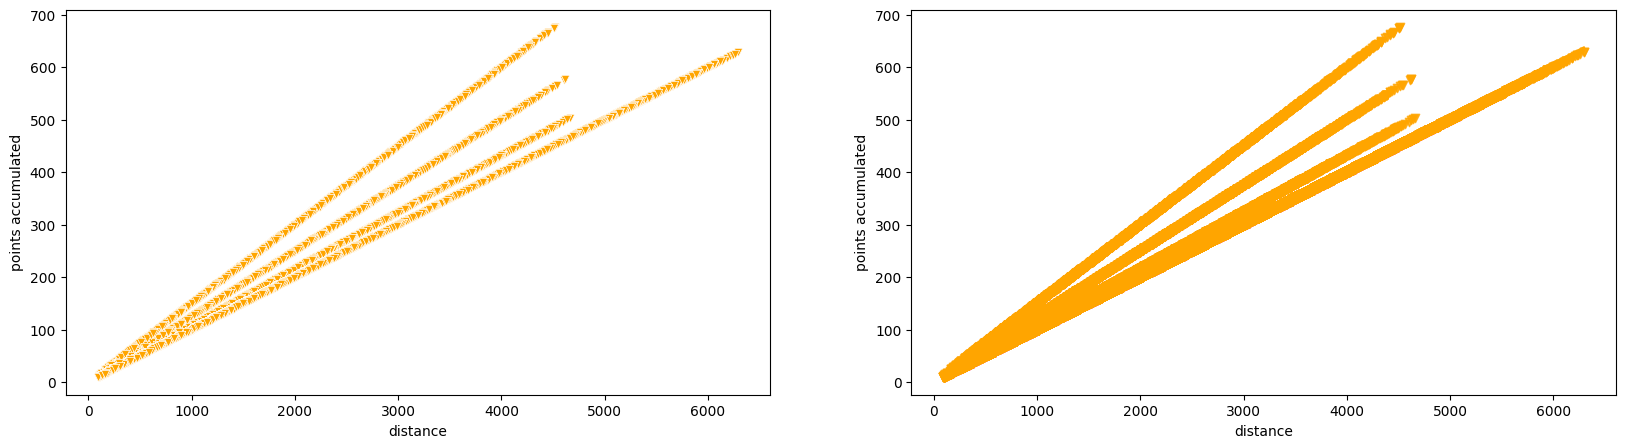

In [176]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[0])

sns.regplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[1])

<Axes: xlabel='distance', ylabel='points accumulated'>

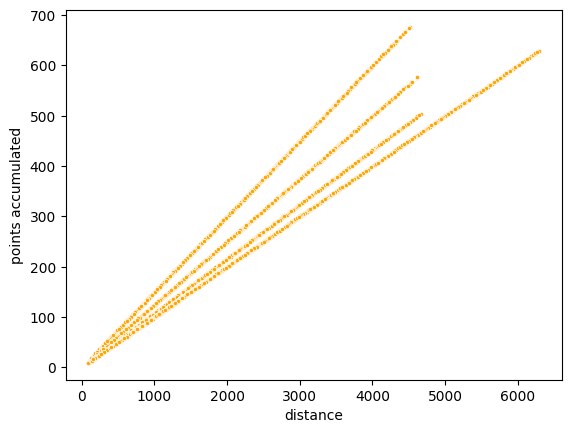

In [186]:
sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='.',
                color = 'orange')

> Son proporcionales, aunque a diferentes escalas. Parece indicar que, según alguna subagrupación como puede ser el grado de loyalty, se otorgan diferentes puntos por distancia.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'alberta'),
  Text(1, 0, 'ontario'),
  Text(2, 0, 'british columbia'),
  Text(3, 0, 'saskatchewan'),
  Text(4, 0, 'quebec'),
  Text(5, 0, 'newfoundland'),
  Text(6, 0, 'manitoba'),
  Text(7, 0, 'new brunswick'),
  Text(8, 0, 'nova scotia'),
  Text(9, 0, 'prince edward island'),
  Text(10, 0, 'yukon')])

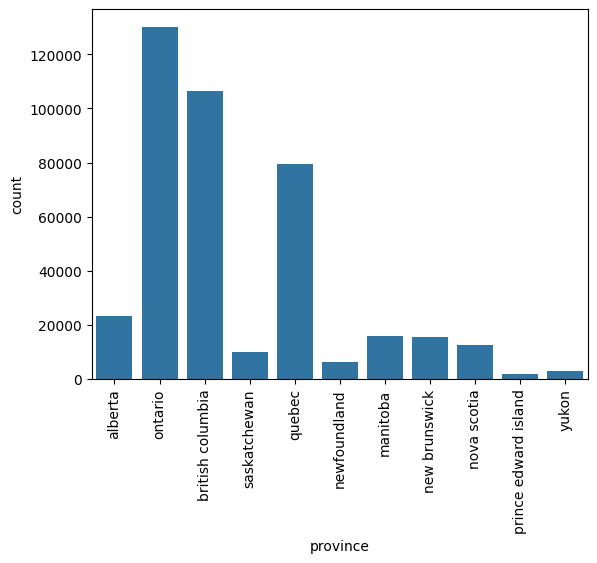

In [191]:
sns.countplot(x='province',
              data=df)
plt.xticks(rotation = 90)

In [198]:
for provincia in df['province'].unique():
    if provincia in ['ontario', 'british columbia', 'quebec']:
        print(f'Clientes de {provincia}:', (df['province'] == provincia).sum())


Clientes de ontario: 130258
Clientes de british columbia: 106442
Clientes de quebec: 79549


> Ontario parece ser la provincia donde hay mayor cantidad de afiliados a la aerolínea, con British Columbia y Quebec a una distancia considerable, pero aun así superior al resto de provincias. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

<Axes: xlabel='education', ylabel='salary'>

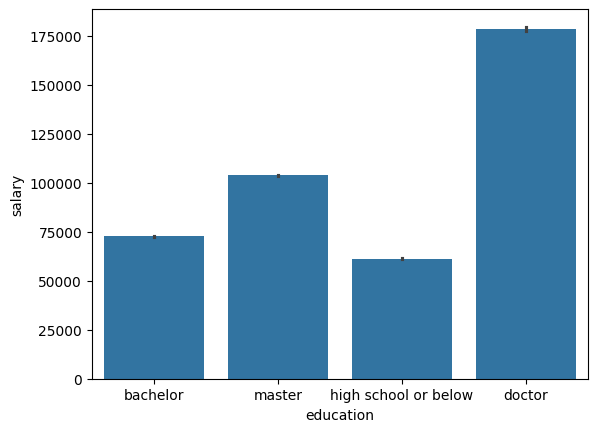

In [199]:
sns.barplot(y='salary',
            x='education',
            data=df[df['education']!='college'])

> tenemos también la categoría 'college', no obstante, no tenemos datos de salario de los usuarios pertenecientes a ese grupo

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?
Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo